In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from neuromancer.psl.coupled_systems import *

# Thermal RC Network

In [5]:
#RC Network
adj = np.array([[0,1],[0,2],[0,3],[1,0],[1,3],[1,4],[2,0],[2,3],[3,0],[3,1],[3,2],[3,4],[4,1],[4,3]]).T
network = RC_Network(nx=5, adj=adj)
sim = network.simulate(nsim=10000)

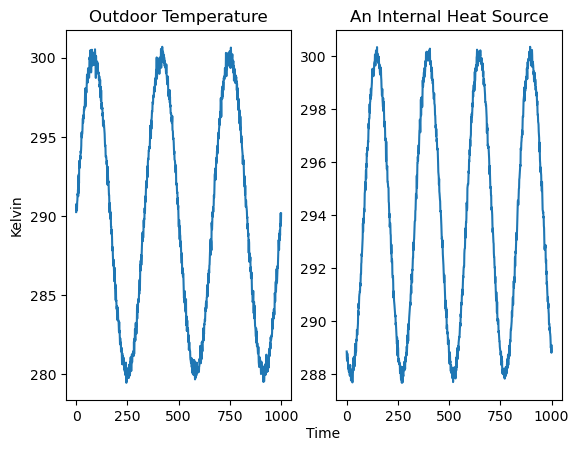

In [6]:
fig, ax = plt.subplots(1,2)
fig.text(0.5, 0.03, 'Time')
ax=ax.flatten()
ax[0].plot(network.U[:,0])
ax[0].set_title('Outdoor Temperature')
ax[0].set_ylabel('Kelvin')
ax[1].plot(network.U[:,1])
ax[1].set_title('An Internal Heat Source');

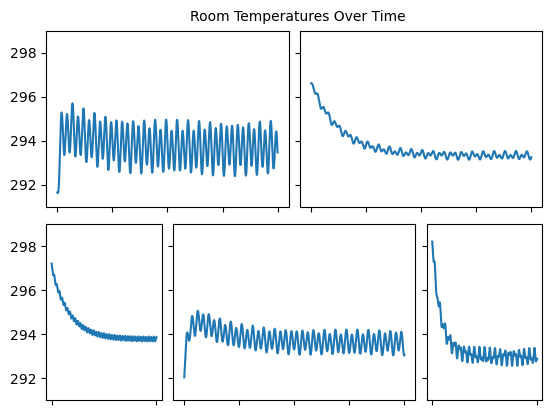

In [7]:
fig = plt.figure()
fig.text(0.35, 0.9, 'Room Temperatures Over Time')
locs = [(0,0),(0,2),(1,0),(1,1),(1,3)]
spans = [2,2,1,2,1]
ax = [plt.subplot2grid((2,4), l, colspan=s) for l,s in zip(locs, spans)]
[ax[i].plot(sim['X'][:,i]) for i in range(len(locs))];
miny = np.floor(np.min(sim['X']))
maxy = np.ceil(np.max(sim['X']))
[a.set_ylim(miny, maxy) for a in ax]
[a.tick_params(labelbottom=False) for a in ax]
[ax[i].tick_params(labelleft=False) for i in [1,3,4]]
fig.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

# Gravitational System

In [9]:
#adj = np.array([[0,1],[0,2],[0,3],[1,0],[2,0],[3,0]]).T #
nsim = 10000
network = Gravitational_System(G=6.67e-11, nx=4)
ninit = np.array([[1000000, 0, 0, 0, 0],
         [1, 1, 0, 0, 8.167e-3],
         [1, 0, 2, 4.0835e-3, 0],
         [1, -1, -1, 4e-3, -4e-3]])
Sim = network.simulate(nsim=nsim, x0=ninit)
sim=Sim['Y']

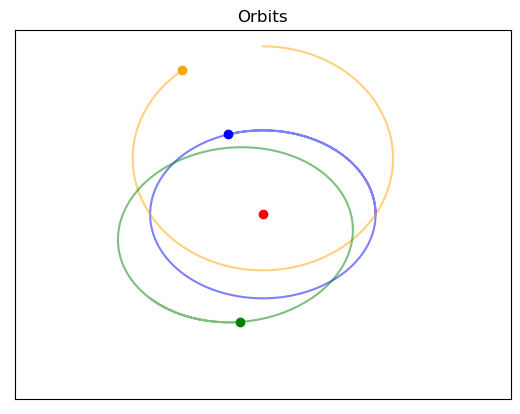

In [17]:
fig, ax = plt.subplots()

ax.set_xlim(-2.2,2.2)

ax.set_xticks([])

ax.set_ylim(-2.2,2.2)

ax.set_yticks([])

colors = ['red','blue','orange','green']

ax.scatter([0], [0], c=colors[0])

ax.set_title('Orbits')

pts = [ax.plot(sim[:,i,1],sim[:,i,2], c=colors[i], alpha=0.5) for i in range(1,sim.shape[1])]

scts = [ax.scatter(sim[-1,i,1], sim[-1,i,2], c=colors[i]) for i in range(1,sim.shape[1])]
plt.show()

# Boid's System

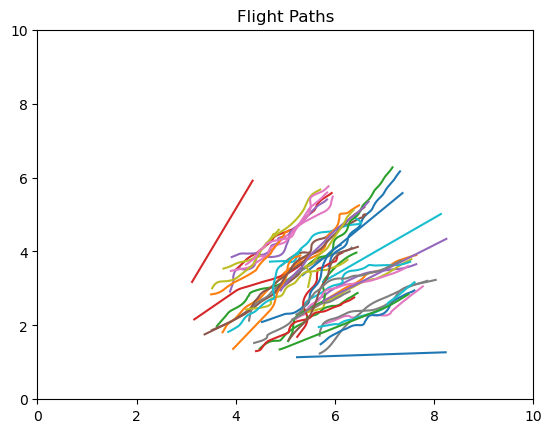

In [21]:
visual_range = 0.3

network = Boids(visual_range=visual_range)

sim = network.simulate()

fig, ax = plt.subplots()

ax.set_xlim(0, 10)

ax.set_ylim(0, 10)

pos = sim['Y']

ax.plot(pos[:, :, 0], pos[:, :, 1])

ax.set_title('Flight Paths')

plt.show()